In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy.linalg import inv
#http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html
#http://mathworld.wolfram.com/LeastSquaresFitting.html

In [2]:
skin = open('linear.points.txt','r')
rl = skin.readlines()
#print(rl)

w = []
count = [0,0]
for e in rl:
    if(e.find('\n') != -1):
        e = e[:-1]
    a = e.split('\t')
    a = [float(i) for i in a]
    w.append(a)

skin.close()

x_points = [(e[0],e[1]) for e in w]
y_points = [e[2] for e in w]

cl_1 = [[e[0],e[1]] for e in w if e[2] == 1]
cl_2 = [[e[0],e[1]] for e in w if e[2] == 2]

cl_1 = np.array(cl_1)
cl_2 = np.array(cl_2)
x_points = np.array(x_points)
y = np.array(y_points)
y.shape = (y.size,1)

In [3]:
def minimized_rss(x,y):
    x_ps = inv(np.dot(x.T,x))
    x_psinv = np.dot(x_ps,x.T)
    w = np.dot(x_psinv,y)
    return w
def fill_poly(x_points,k=1):
    x= []
    for xp in x_points:
        each =[]
        for i in range(k+1):
            each.append(xp**i)
        x.append(each)
    x = np.array(x)
    #print(x)
    return x
def multi_feat(x_points):
    z = [(1,e[0],e[1]) for e in x_points]
    return np.array(z)
def y_hat(w,x):
    eq_ln = []
    ln = len(w)
    for l in range(ln):
        eq_ln.append(w[l]*(x_points**(l)))
    eq_ln = np.sum(eq_ln,axis=0)
    return eq_ln
def y_mult(w,x):
    eq_ln = []
    for l in range(len(w)):
        eq_ln.append(w[l]*(x_points))
    
    eq_ln = np.sum(eq_ln,axis=0)
    return eq_ln
def Er(y_h,y_points):
    a = 0.5 * np.sum((y_h - y_points )**2 )
    #print(a)
    return a
def rms(y_h,y_points):
    return np.sqrt(2*Er(y_h,y_points) / len(y_points))

In [4]:
mini = 65
rmses = []
k = 1 #Best K-th order model
#x = fill_poly(x_points,k)
x = multi_feat(x_points)
w = minimized_rss(x,y)
print('Weights\n' , w)

y_h = y_mult(w,x_points)


Weights
 [[ 1.68076076]
 [ 0.51264798]
 [ 0.60487211]]


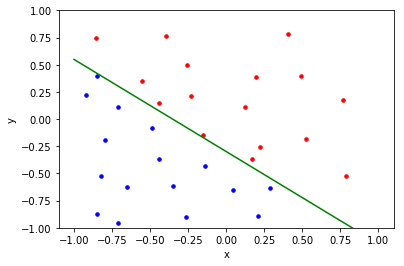

In [8]:
plt.ylim(-1,1)
plt.plot(cl_1[:,0],cl_1[:,1],'bo',ms = 3.501)
plt.plot(cl_2[:,0],cl_2[:,1],'ro',ms = 3.501)

space = np.linspace(-1, 1.0, num=100)
y_eq = (-w[0] + 1.5-w[1]*space) / w[2]
plt.plot(space,y_eq,'g', ms=0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.show()